# Import all necessary libraries

In [25]:
import pandas as pd #library for dataframe manipulation 
import numpy as np #library for mathematical operations on arrays 
import seaborn as sns #library for intriguing data visuals

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor, MLPClassifier

import warnings 
warnings.filterwarnings(action="ignore")

# Loading the Dataset

In [26]:
df = pd.read_csv("../Notebooks/forestfires_off.csv")
df

,X,Y,month,day,FFMC,DMC,DC,FSS,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,2.350497,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,2.744161,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,2.744161,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,3.169925,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,3.263034,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,0.925999,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,0.925999,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,0.925999,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,3.498251,25.6,42,4.0,0.0,0.00


# Take a quick look at the data information and dimensions 

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   FSS     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [28]:
print("Dataset has:", df.shape[0], 'rows and', df.shape[1],'columns')

Dataset has: 517 rows and 13 columns


In [29]:
df.describe()

,X,Y,FFMC,DMC,DC,FSS,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,2.985033,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,0.807604,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,-1.321928,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,2.700440,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,3.070389,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,3.432959,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,5.809929,33.300000,100.000000,9.400000,6.400000,1090.840000


# Cleaning Dataset and dropping null values

In [30]:
def find_missing_and_drop(dataframe):
    nullcount= dataframe.isnull().sum().sum()
    if nullcount > 0:
        dataframe.dropna(inplace=True)
        dataframe.reset_index()
        print("number of null values dropped:%d"  %nullcount)
    else:
        print("there are no null values in this dataset")
    
    


find_missing_and_drop(df)



## if there were any missing values you would have to drop the rows that contain the null values and then it is important to
# reset the index of the data so that it can reorganize after removing the missing values.

#note: removing null values does not necessarily take out the whole data row from the dataset, you would still have to take 
# the empty row space out of the dataset.

there are no null values in this dataset


# Preprocessing and feature engineering 

In [31]:
def ordinal_encode(dataframe, column, ordering): # function to convert ordinal categorical data into numerical values
    dataframe = dataframe.copy()
    dataframe[column] = dataframe[column].apply(lambda x: ordering.index(x))
    return dataframe




def preprocess_inputs(dataframe): # function that takes the ordinal_encode function and applys it to the specified column of
    dataframe =  dataframe.copy() # a specified dataset
    #encode ordering for month and day
    dataframe = ordinal_encode(
        dataframe,
        column='month',
        ordering=[
            'jan',
            'feb',
            'mar',
            'apr',
            'may',
            'jun',
            'jul',
            'aug',
            'sep',
            'oct',
            'nov',
            'dec'
        ]
    )
    return dataframe
    

In [32]:
x = preprocess_inputs(df)
x

,X,Y,month,day,FFMC,DMC,DC,FSS,temp,RH,wind,rain,area
0,7,5,2,fri,86.2,26.2,94.3,2.350497,8.2,51,6.7,0.0,0.00
1,7,4,9,tue,90.6,35.4,669.1,2.744161,18.0,33,0.9,0.0,0.00
2,7,4,9,sat,90.6,43.7,686.9,2.744161,14.6,33,1.3,0.0,0.00
3,8,6,2,fri,91.7,33.3,77.5,3.169925,8.3,97,4.0,0.2,0.00
4,8,6,2,sun,89.3,51.3,102.2,3.263034,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,7,sun,81.6,56.7,665.6,0.925999,27.8,32,2.7,0.0,6.44
513,2,4,7,sun,81.6,56.7,665.6,0.925999,21.9,71,5.8,0.0,54.29
514,7,4,7,sun,81.6,56.7,665.6,0.925999,21.2,70,6.7,0.0,11.16
515,1,4,7,sat,94.4,146.0,614.7,3.498251,25.6,42,4.0,0.0,0.00


In [33]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Ordinal encode month and day columns
    df = ordinal_encode(
        df,
        column='month',
        ordering=[
            'jan',
            'feb',
            'mar',
            'apr',
            'may',
            'jun',
            'jul',
            'aug',
            'sep',
            'oct',
            'nov',
            'dec'
        ]
    )
    df = ordinal_encode(
        df,
        column='day',
        ordering=[
            'sun',
            'mon',
            'tue',
            'wed',
            'thu',
            'fri',
            'sat'
        ]
    )

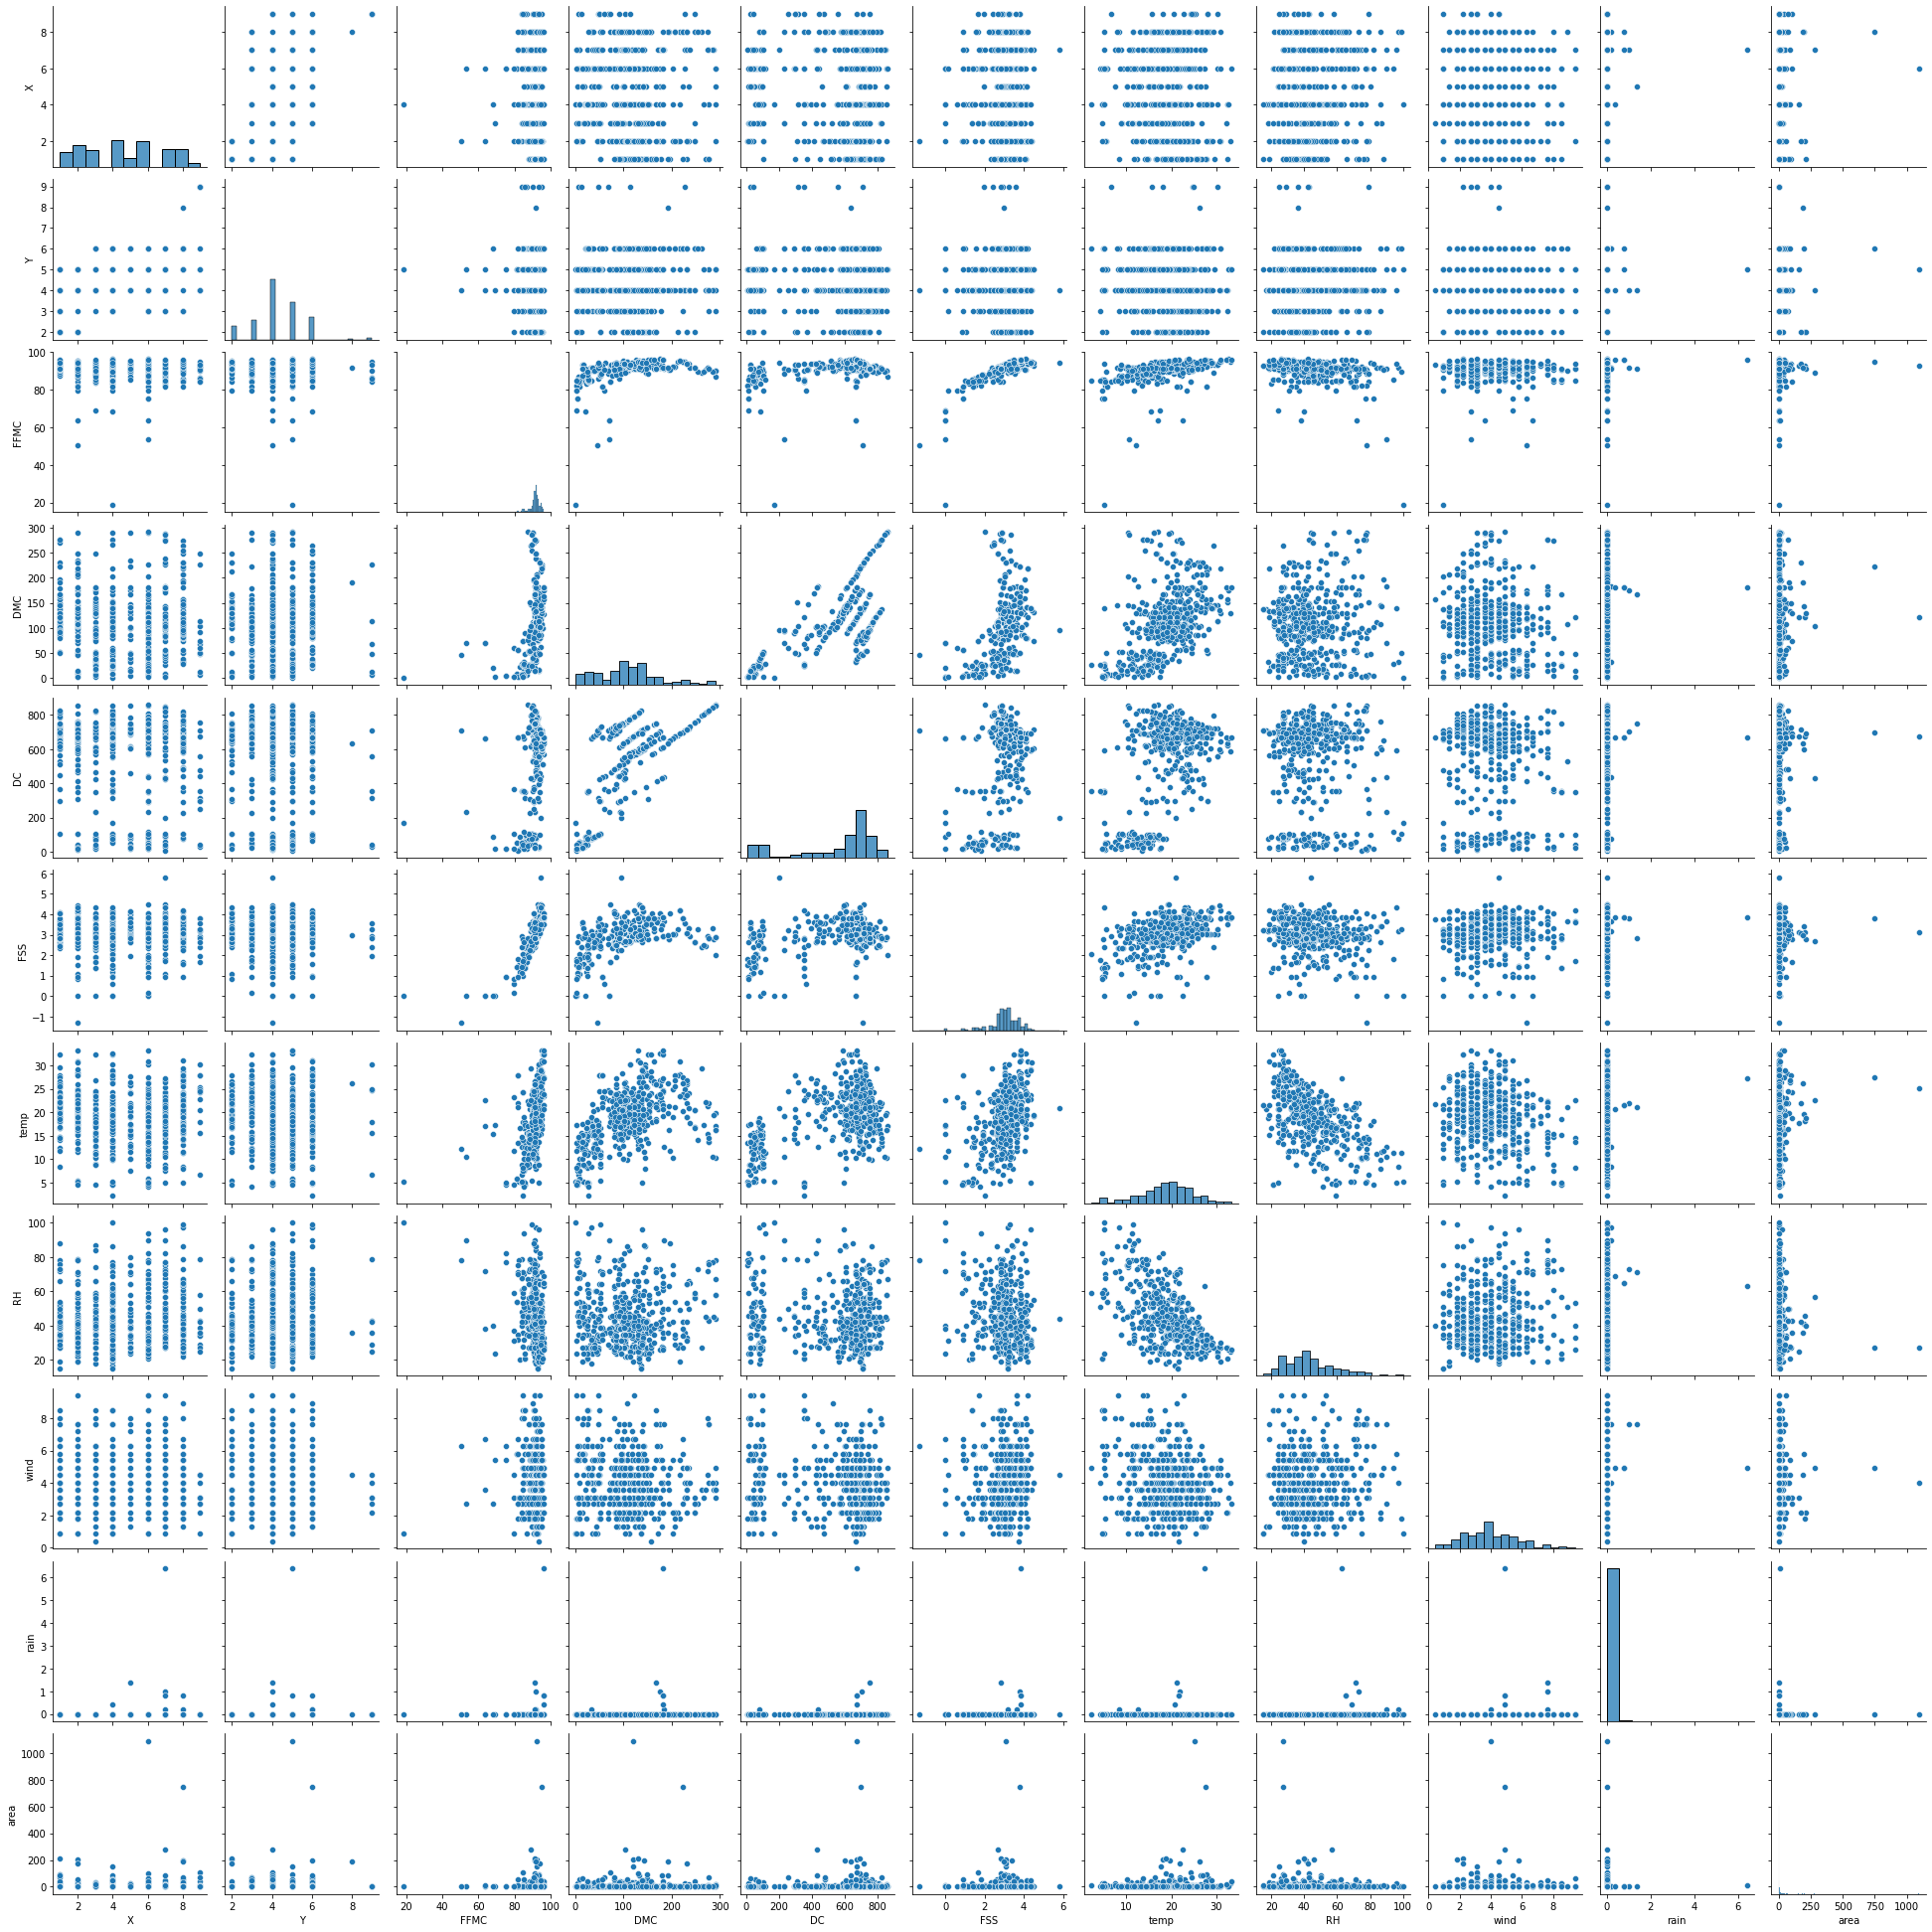

In [34]:
sns.pairplot(df)


<AxesSubplot:>

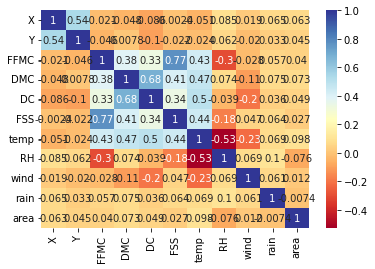

In [35]:
corrv= df.corr()
sns.heatmap(corrv, annot=True, cmap = 'RdYlBu')